Problem statement:

Situation: Energy is produced in different forms and consumed by the regions in different rates.   

Complication: Energy prices are increasing due to many reasons including but not limited to war, logistics and sanctions.   

Question: Is it possible to see what types of energy have been historically produced and consumed by the different regions? Is it possible to predict how the productions and consumption will look like in the future?   

Answer: ???


# Beskrivande analys av data

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='crest')


In [217]:
leveranser_flytande = pd.read_table('../data/to-use/leveranser-flytande-bransle-region-ar.csv', sep=',')
elproduction_bransleanvandning = pd.read_table('../data/to-use/elproduction-bransleanvandning-region-produktionssatt-bransletyp-ar.csv', sep=',')
fjarrvarmeproduktion = pd.read_table('../data/to-use/fjarrvarmeproduktion-region-produktionssatt-bransletyp-ar.csv', sep=',')
slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')
branslefarbrukning = pd.read_table('../data/to-use/branslefarbrukning-far-produktion-per-ar.csv', sep=',')
energidata = pd.read_table('../data/to-use/energidata-per-ar.csv', sep=',')


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3087391659.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')


## Datasets
### leveranser_flytande 
> Leveranser av bränsle, kubikmeter efter region, bränsletyp, färbrukarkategori och är   

Datauppsättningen innehåller information om de flytande bränslen som används av varje region årligen.

### elproduction_bransleanvandning 
> Elproduktion och bränsleanvändning (MWh) efter region, produktionssätt, bränsletyp och är   

Datauppsättningen innehåller information om energiförbrukningen per typ för varje region, årligen.

### fjarrvarmeproduktion 
> Fjärrvärmeproduktion och bränsleanvändning (MWh) efter region, produktionssätt, bränsletyp och är

Datauppsättningen innehåller information om den fjärrvärmeproduktion och förbrukningen per typ för varje region, årligen.

### slutanvandning 
> Slutanvändning (MWh) efter region, förbrukarkategori, bränsletyp och är

Datauppsättningen innehåller information om energi och förbrukning vid slutpunkten per energityp för varje region, årligen.

### branslefarbrukning 
> Bränslefärbrukning fär produktion av ånga och hetvatten, TJ efter produktionsslag, bränsletyp och är

Datauppsättningen innehåller information om förbrukningen av energi för vattenuppvärmning per energislag årligen

### energidata 
> Energidata (MWh) efter region, kategori, energityp och år

Datauppsättningen innehåller information om energiregion och energityp årligen.

In [218]:
datasets = [leveranser_flytande, elproduction_bransleanvandning, 
            fjarrvarmeproduktion, slutanvandning, branslefarbrukning, energidata]

variables = ['region', 'bransletyp', 'ar', 'm3', 'farbrukarkategori', 'produktionssatt',
             'MWh', 'kategori', 'energityp', 'produktionsslag', 'branslefarbrukning']



En av de första sakerna som behöver göras är att ta itu med NA:s värderingar. I det här fallet använde vi olika typer av imputering

- leveranser_flytande,m3: fillna (fffill)
- fjarrvarmeproduktion: interpolate
- slutanvandning: Not used since nore than one columns have NAs that are categorical - dabading using this dataframe at all; considering it needs reworking in the merging phase.
- energidata.MWh: fillna (fffill)

In [219]:
for d in datasets:
    name = [x for x in globals() if globals()[x] is d][0]
    print('Dataframe: ', name)
    
    contains_nulls = d.isna().sum()
    print('Number of Nuls: ', contains_nulls, 'out of', len(d))
    # print(d.describe(include='object'))



Dataframe:  leveranser_flytande
Number of Nuls:  region                      0
bransletyp                  0
ar                          0
m3                     139680
forbrukarkategori       74494
fornybar_bransletyp         0
dtype: int64 out of 353854
Dataframe:  elproduction_bransleanvandning
Number of Nuls:  region                      0
produktionssatt             0
bransletyp                  0
ar                          0
MWh                         0
fornybar_bransletyp         0
fornybar_produktionssatt    0
dtype: int64 out of 194832
Dataframe:  fjarrvarmeproduktion
Number of Nuls:  region                           0
produktionssatt                  0
bransletyp                       0
ar                               0
MWh                         419328
fornybar_bransletyp              0
fornybar_produktionssatt         0
dtype: int64 out of 917532
Dataframe:  slutanvandning
Number of Nuls:  region                      0
forbrukarkategori      159390
bransletyp           

In [220]:
leveranser_flytande.m3 = leveranser_flytande.m3.fillna(method='ffill'); print('leveranser_flytande: Number of Nuls: ', leveranser_flytande.isna().sum().sum(), 'out of', len(leveranser_flytande))
fjarrvarmeproduktion.MWh = fjarrvarmeproduktion.MWh.interpolate(); print('fjarrvarmeproduktion: Number of Nuls: ', fjarrvarmeproduktion.isna().sum().sum(), 'out of', len(fjarrvarmeproduktion))
# slutanvandning = slutanvandning.fillna('fffill'); print('slutanvandning: Number of Nuls: ', slutanvandning.isna().sum().sum(), 'out of', len(slutanvandning))
energidata.MWh = energidata.MWh.fillna(method='ffill'); print('energidata: Number of Nuls: ', energidata.isna().sum().sum(), 'out of', len(energidata))


leveranser_flytande: Number of Nuls:  74494 out of 353854
fjarrvarmeproduktion: Number of Nuls:  0 out of 917532
energidata: Number of Nuls:  0 out of 4941090


### Descriptive analysis for the leveranser_flytande dataset

0180 Stockholm


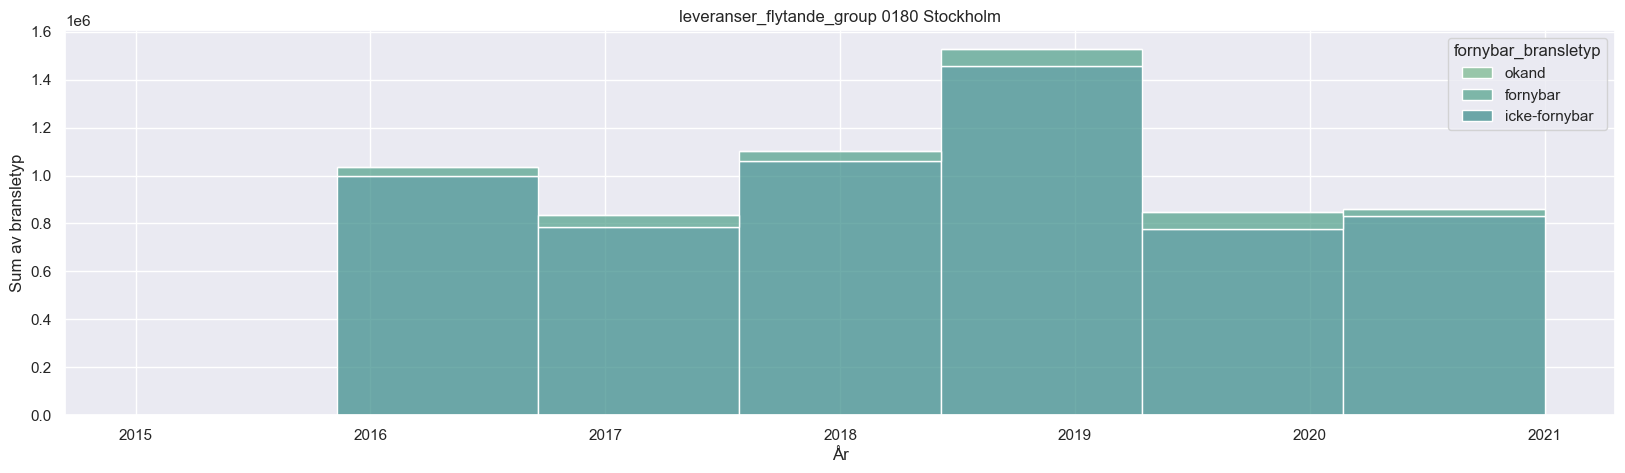

0581 Norrk�ping


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


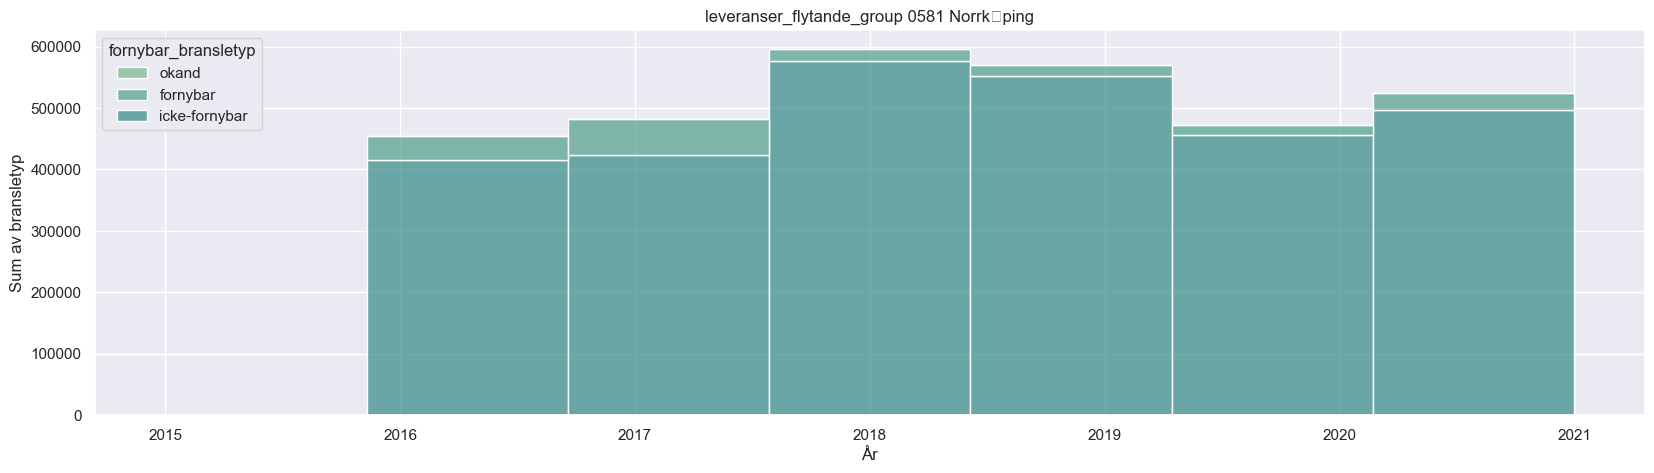

0680 J�nk�ping


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


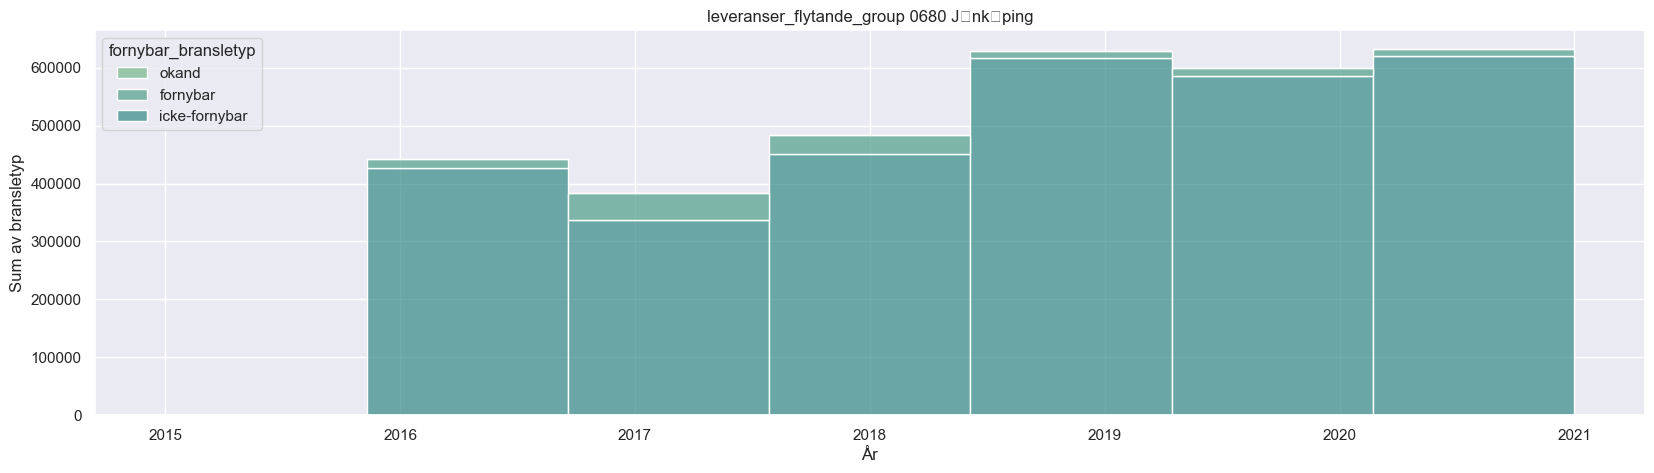

1480 G�teborg


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


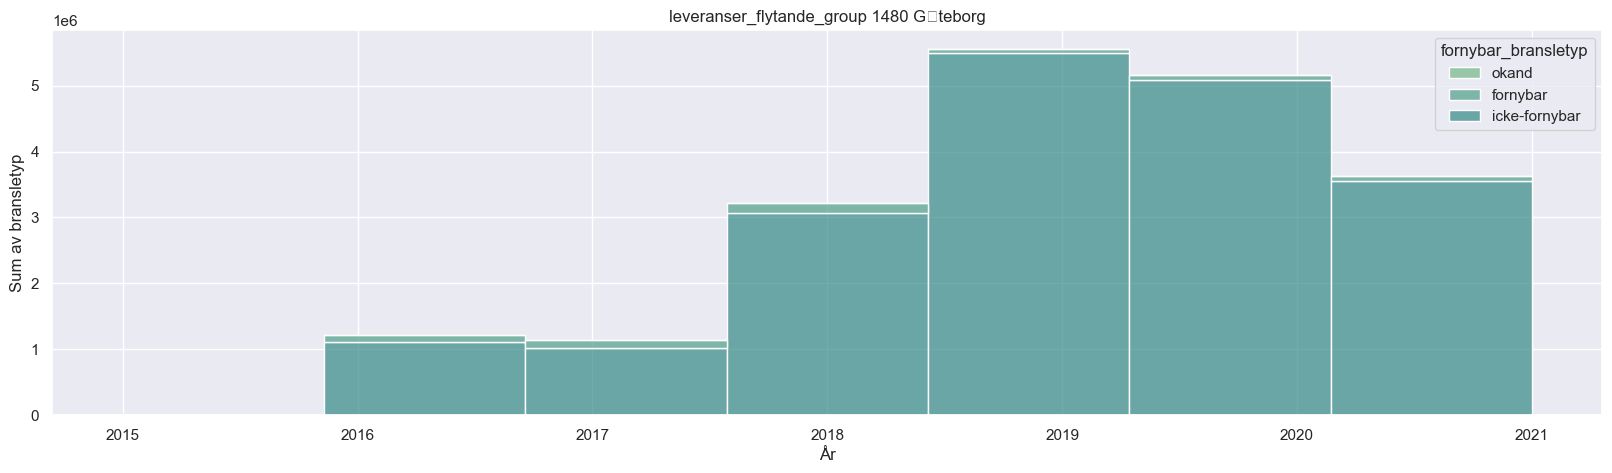

1484 Lysekil


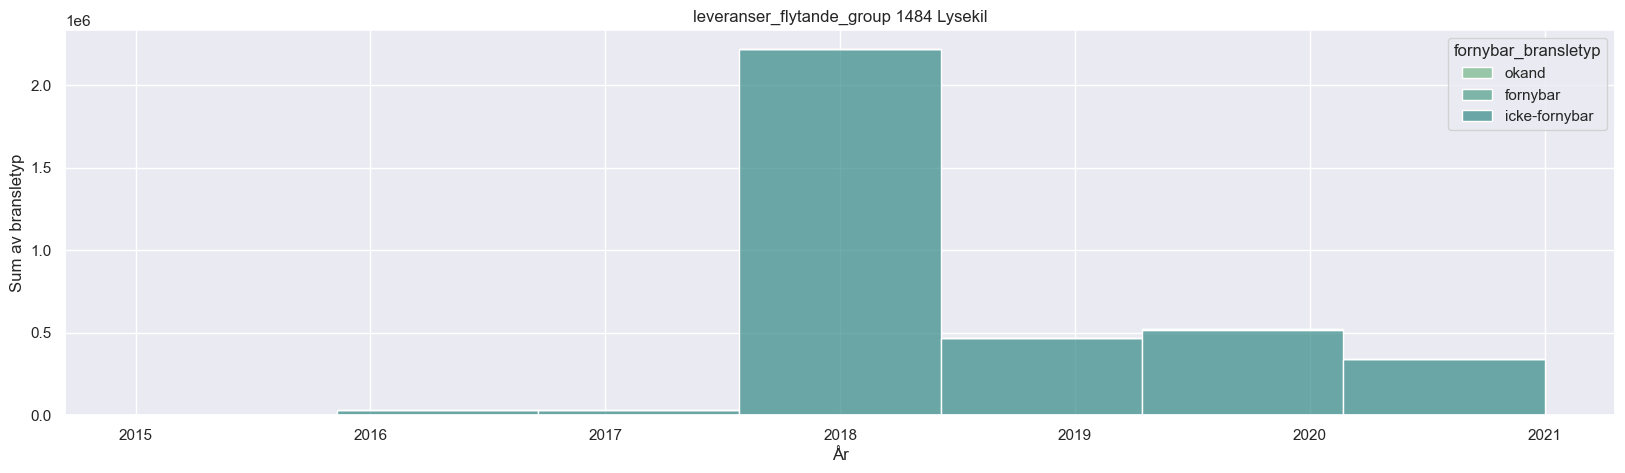

1780 Karlstad


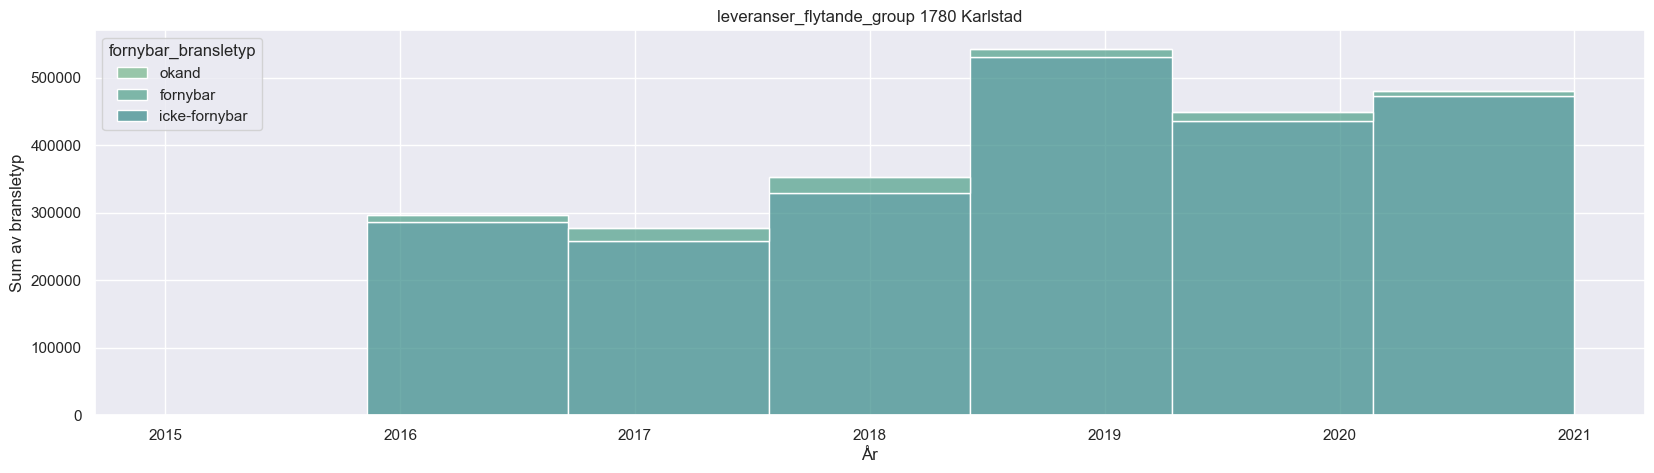

In [221]:
## leveranser_flytande

leveranser_flytande_group = leveranser_flytande.groupby(['region', 'ar', 'fornybar_bransletyp'], as_index=False
                 ).agg(
                        Mean=('m3', np.mean),
                        Sum=('m3', np.sum), 
                        Avg=('m3', np.average),
                        Count=('m3', 'count'),
                        Max=('m3', np.max),
                        Min=('m3', np.min)
                 ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# temp['col'] = temp.region + temp.ar.astype(str) + temp.fornybar_bransletyp


# # leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).min(0)
# leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).max(0)

leveranser_flytande_group.region.tail(20).drop_duplicates(keep='first').reset_index(drop=True)

leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.region.isin(
    ["1484 Lysekil", "1780 Karlstad", "0581 Norrk�ping", "0680 J�nk�ping", "0180 Stockholm", "1480 G�teborg"])].reset_index(
    drop=True)

leveranser_flytande_group.ar = leveranser_flytande_group.ar.astype(int)

leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.ar >= 2015].reset_index(
    drop=True)


# leveranser_flytande_group

for region in leveranser_flytande_group.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[leveranser_flytande_group.region == region].reset_index(drop=True)
    fig = sns.histplot(data=data, 
                    x=data.ar.astype(int), 
                    weights='Sum', 
                    hue='fornybar_bransletyp', 
                    multiple='stack',
                    bins=7)
    fig.set_title('leveranser_flytande_group ' + region)
    fig.set_xlabel('År')
    fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### elproduction_bransleanvandning

03 Uppsala l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3136391333.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


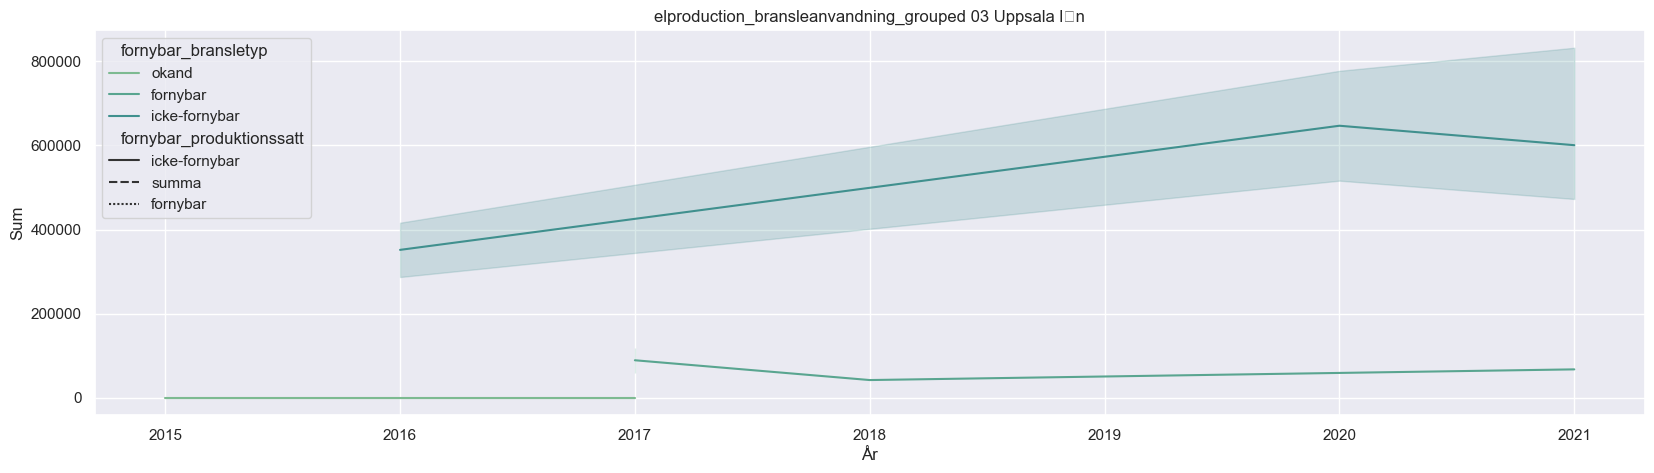

0382 �sthammar


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3136391333.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


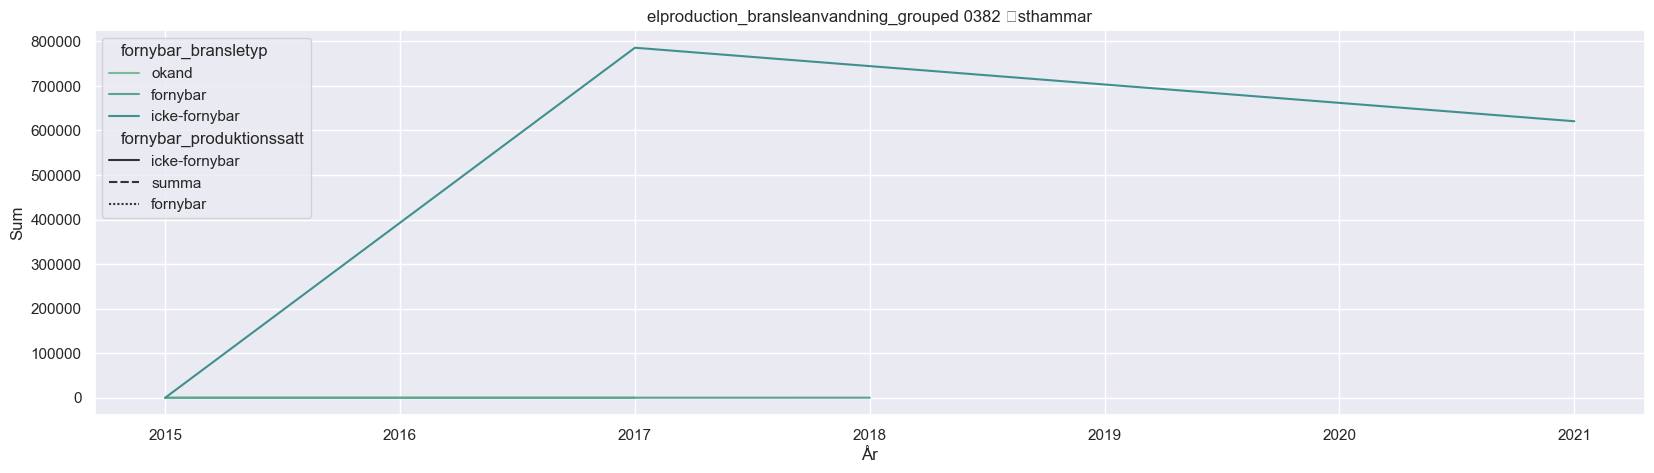

1383 Varberg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3136391333.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(


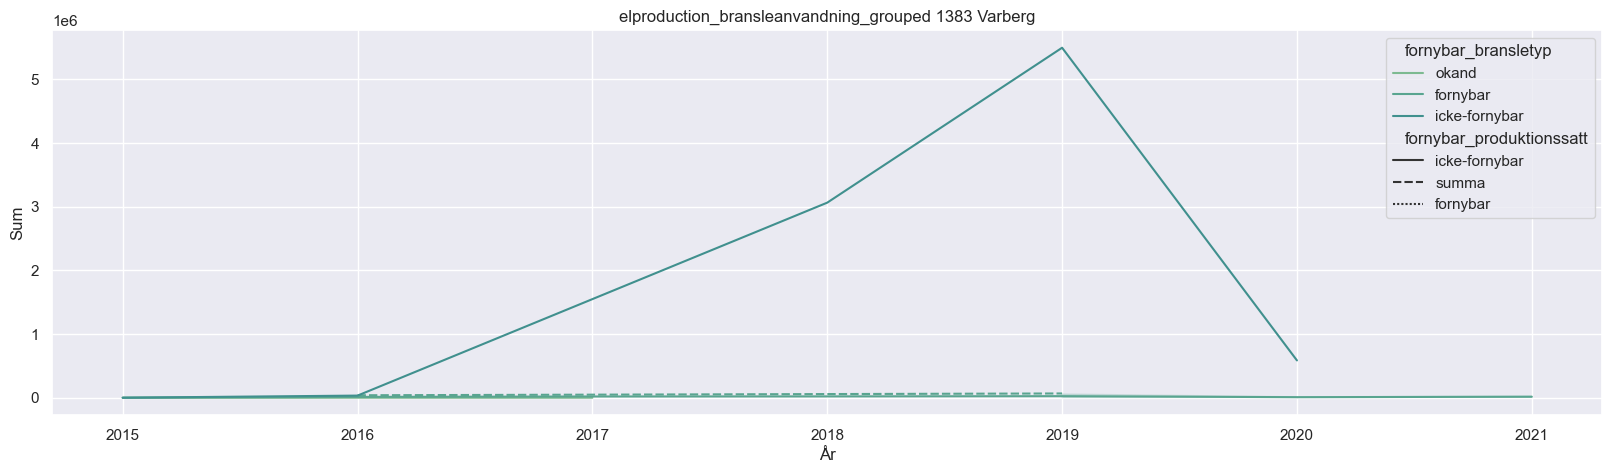

13 Hallands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3136391333.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


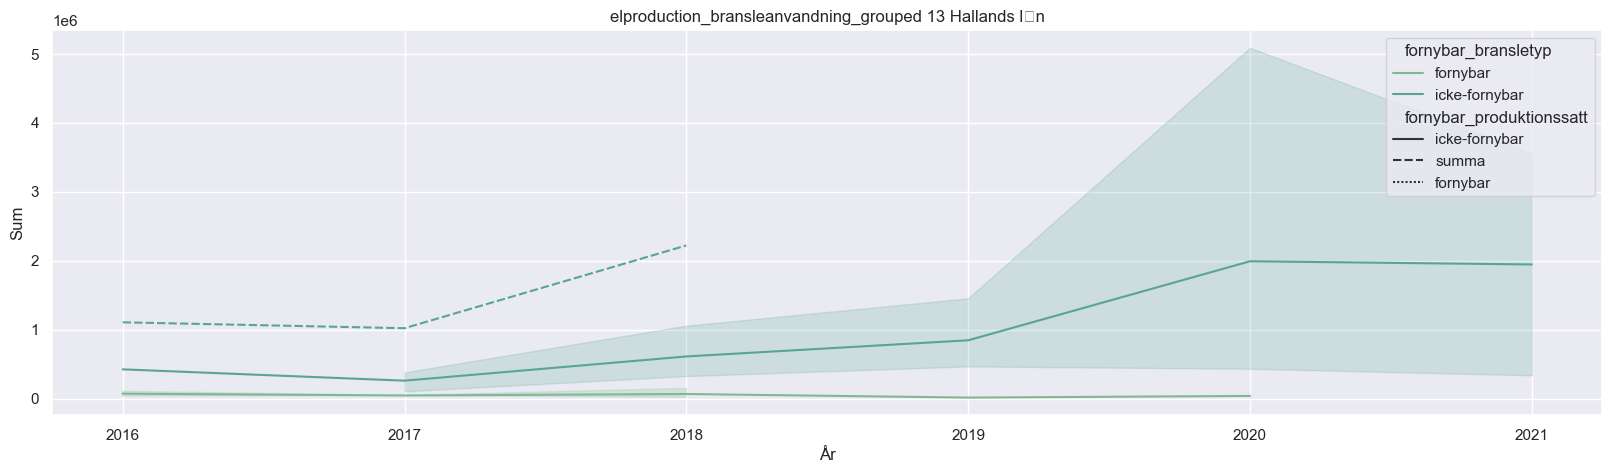

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3136391333.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(


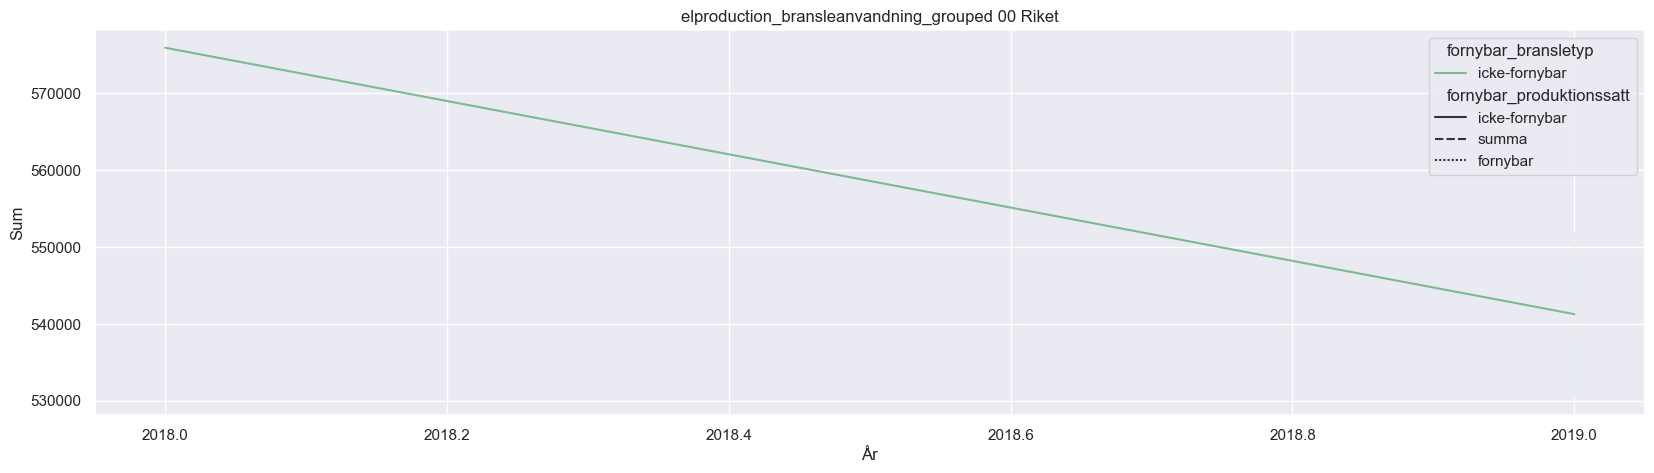

In [222]:
# elproduction_bransleanvandning


elproduction_bransleanvandning_grouped = elproduction_bransleanvandning.groupby(['region', 'ar', 'fornybar_bransletyp', 'fornybar_produktionssatt'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# elproduction_bransleanvandning_grouped


elproduction_bransleanvandning_grouped.region.tail(70).drop_duplicates(
    keep='first').reset_index(drop=True)


# '00 Riket', '03 Uppsala l�n', '1383 Varberg', '13 Hallands l�n', '0382 �sthammar'

elproduction_bransleanvandning_grouped = elproduction_bransleanvandning_grouped[elproduction_bransleanvandning_grouped.region.isin([
    '00 Riket', '03 Uppsala l�n', '1383 Varberg', '13 Hallands l�n', '0382 �sthammar'])].reset_index(drop=True)

# elproduction_bransleanvandning_groued.ar = elproduction_bransleanvandning_groued.ar.astype(int)

# leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.ar >= 2015].reset_index(
#     drop=True)


# elproduction_bransleanvandning_grouped


for region in elproduction_bransleanvandning_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                       style=elproduction_bransleanvandning_grouped.fornybar_produktionssatt)
    fig.set_title('elproduction_bransleanvandning_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### fjarrvarmeproduktion

2582 Boden


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


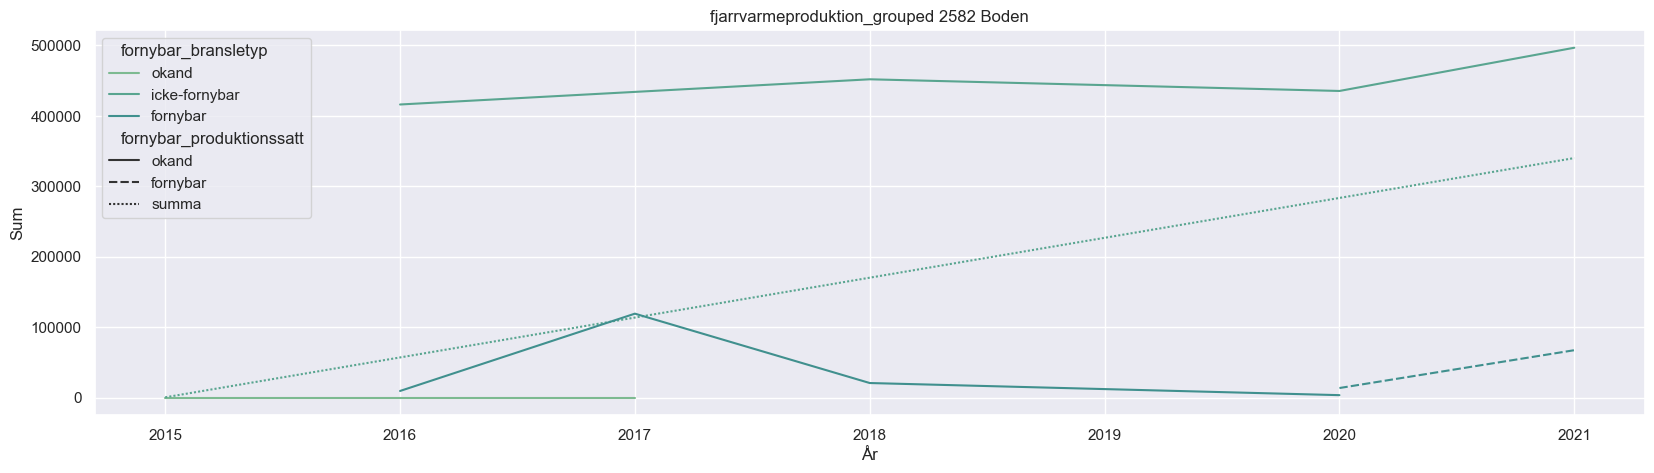

2583 Haparanda


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


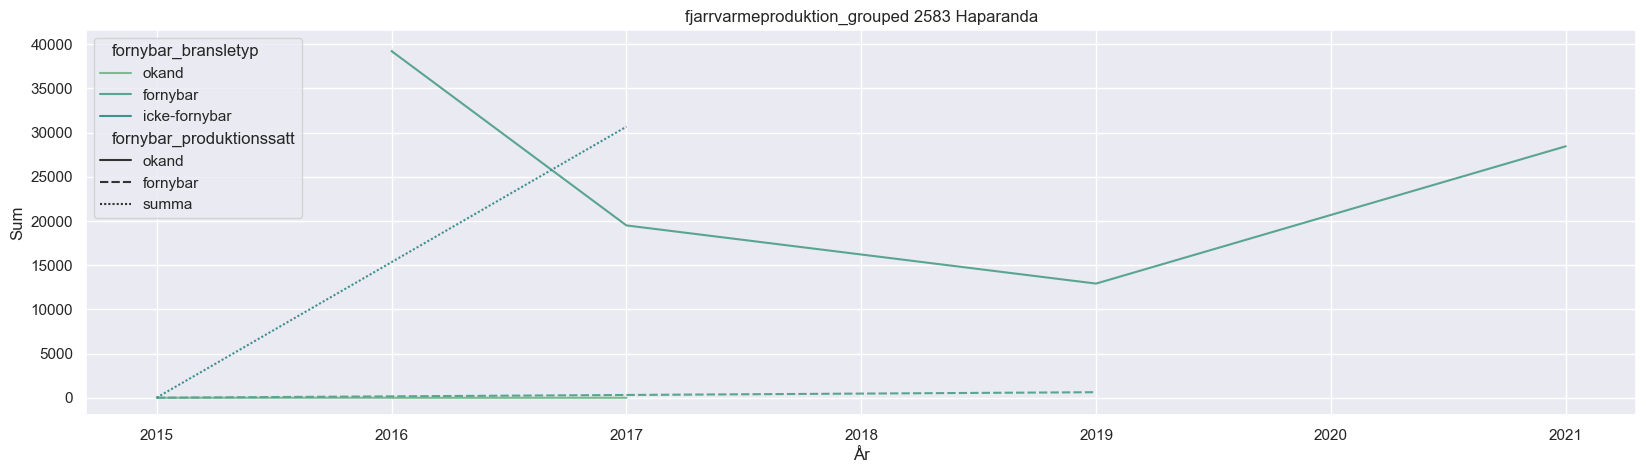

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


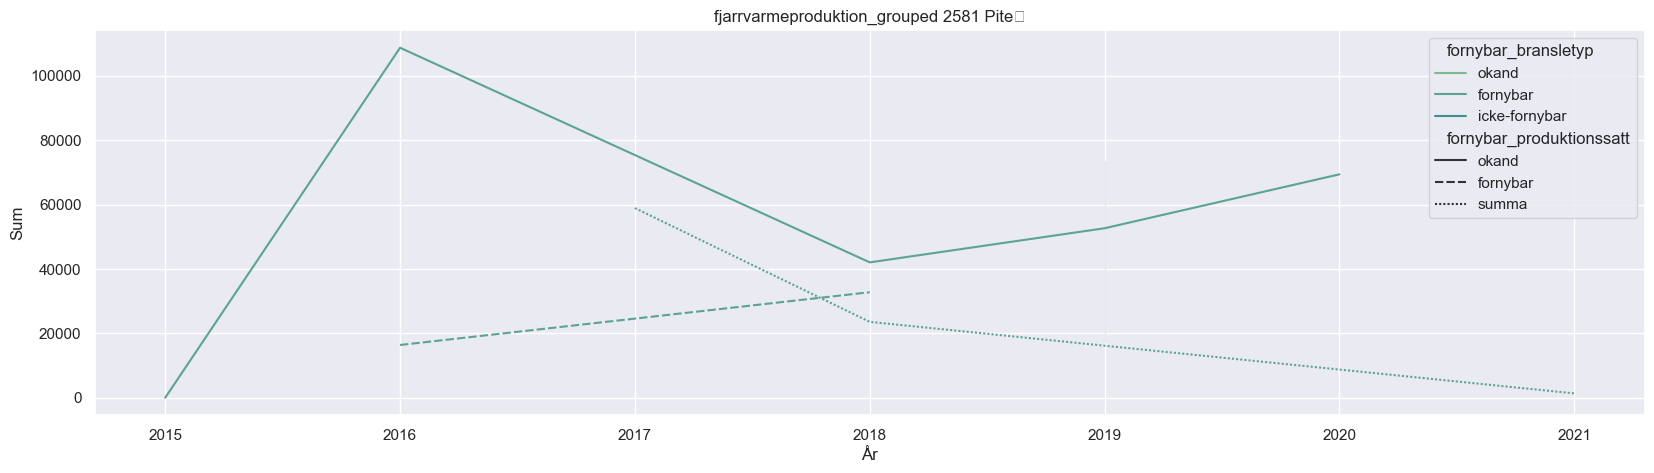

2580 Lule�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


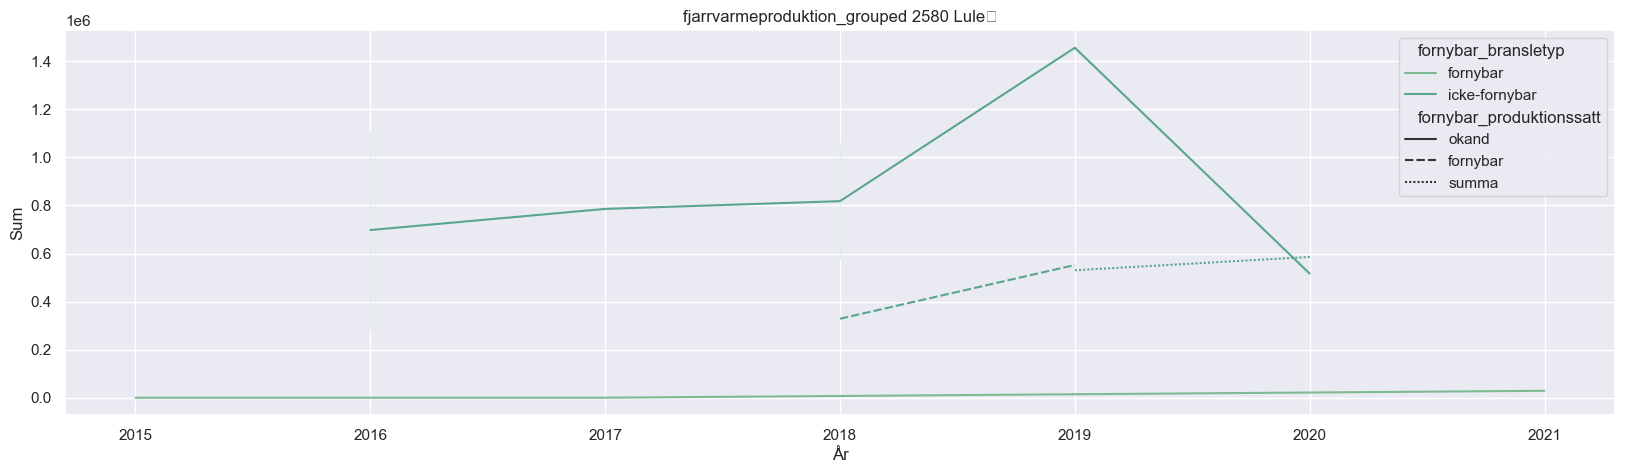

2584 Kiruna


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


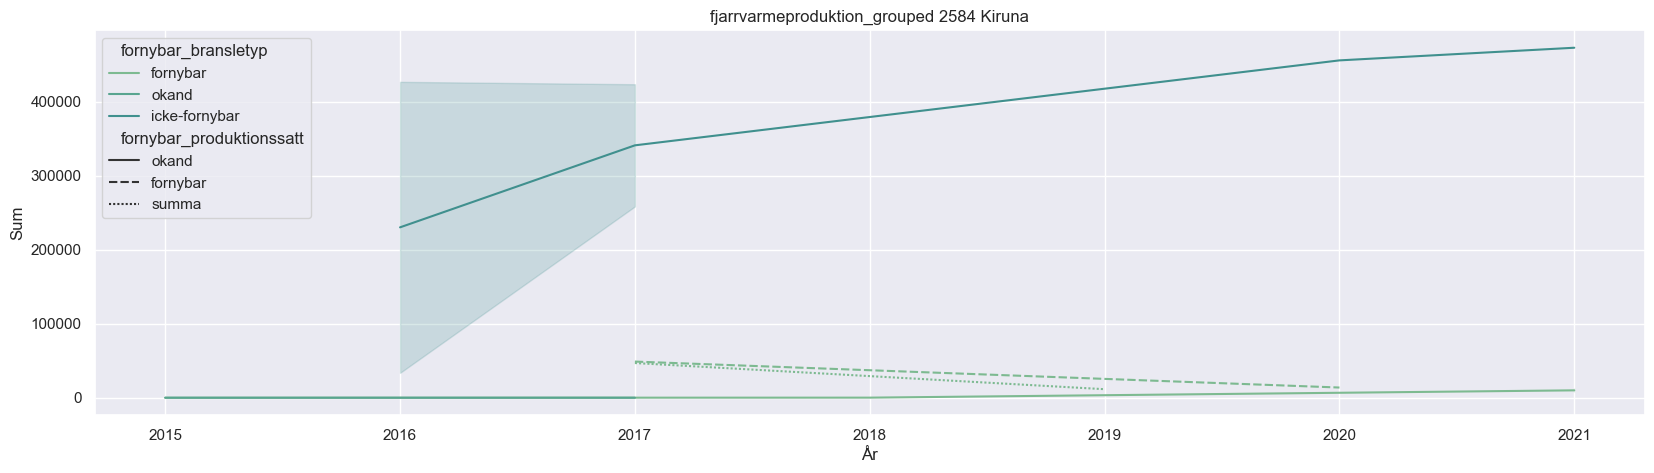

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3283343160.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


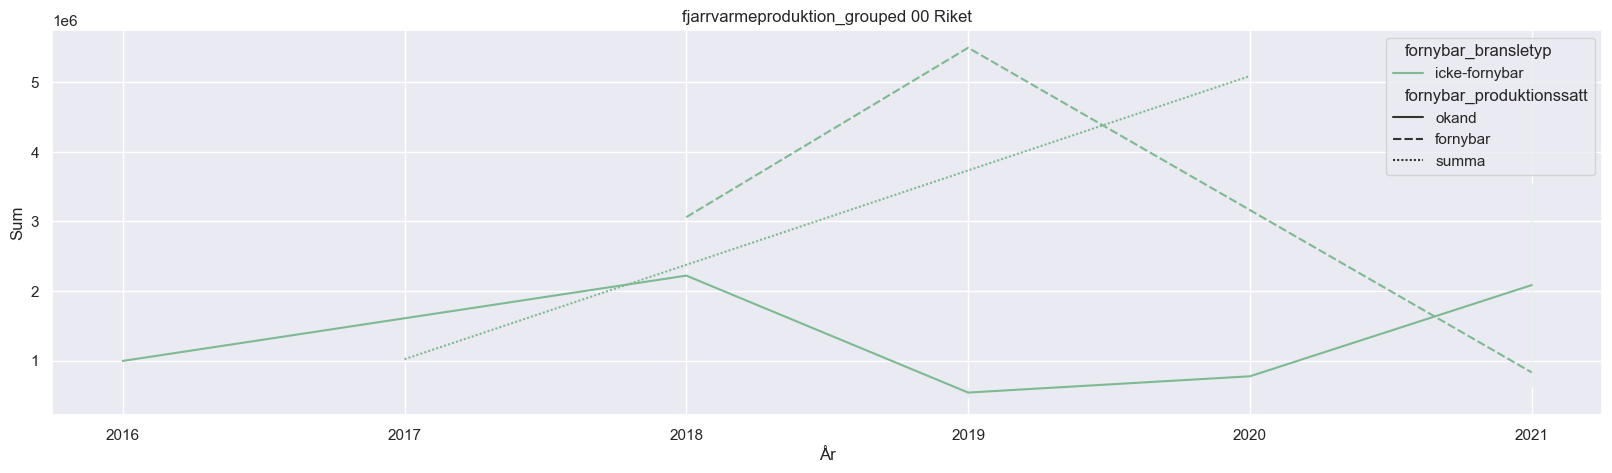

In [223]:
# fjarrvarmeproduktion


fjarrvarmeproduktion_grouped = fjarrvarmeproduktion.groupby(['region', 'ar', 'fornybar_bransletyp', 'fornybar_produktionssatt'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# fjarrvarmeproduktion_grouped



fjarrvarmeproduktion_grouped.region.tail(20).drop_duplicates(
    keep='first').reset_index(drop=True)

# '2580 Lule�','2582 Boden','2581 Pite�','2583 Haparanda','2584 Kiruna','00 Riket'


fjarrvarmeproduktion_grouped = fjarrvarmeproduktion_grouped[fjarrvarmeproduktion_grouped.region.isin([
    '2580 Lule�', '2582 Boden', '2581 Pite�', '2583 Haparanda', '2584 Kiruna', '00 Riket'])].reset_index(drop=True)


# fjarrvarmeproduktion_grouped


for region in fjarrvarmeproduktion_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                       style=fjarrvarmeproduktion_grouped.fornybar_produktionssatt)
    fig.set_title('fjarrvarmeproduktion_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### slutanvandning

2560 �lvsbyn


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


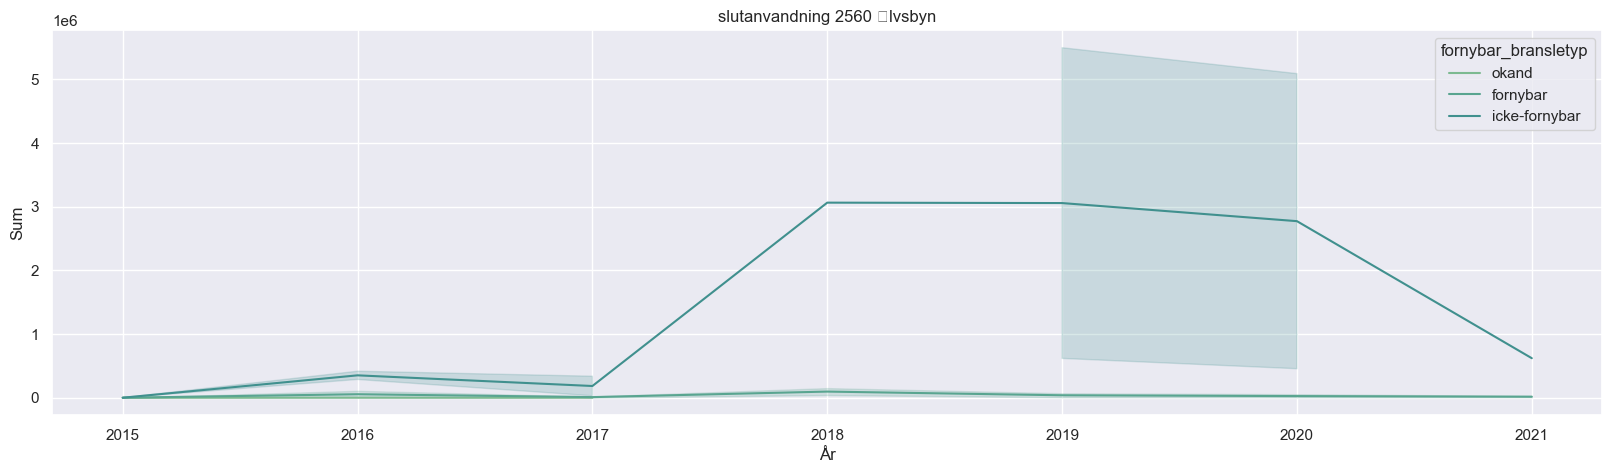

2580 Lule�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


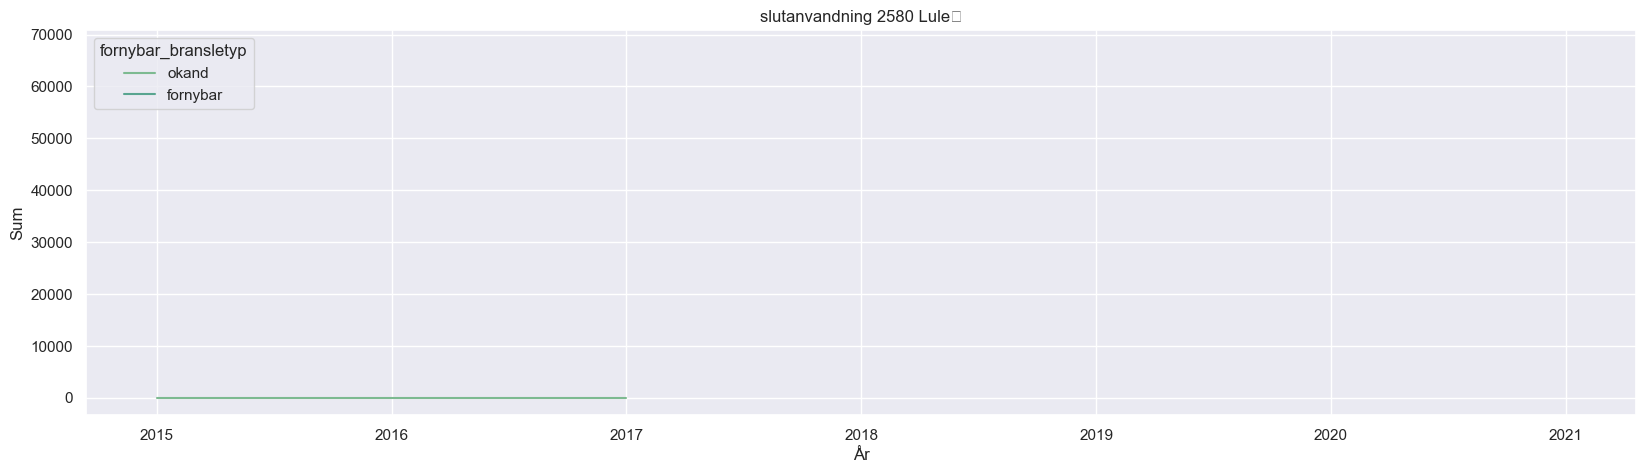

2583 Haparanda


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


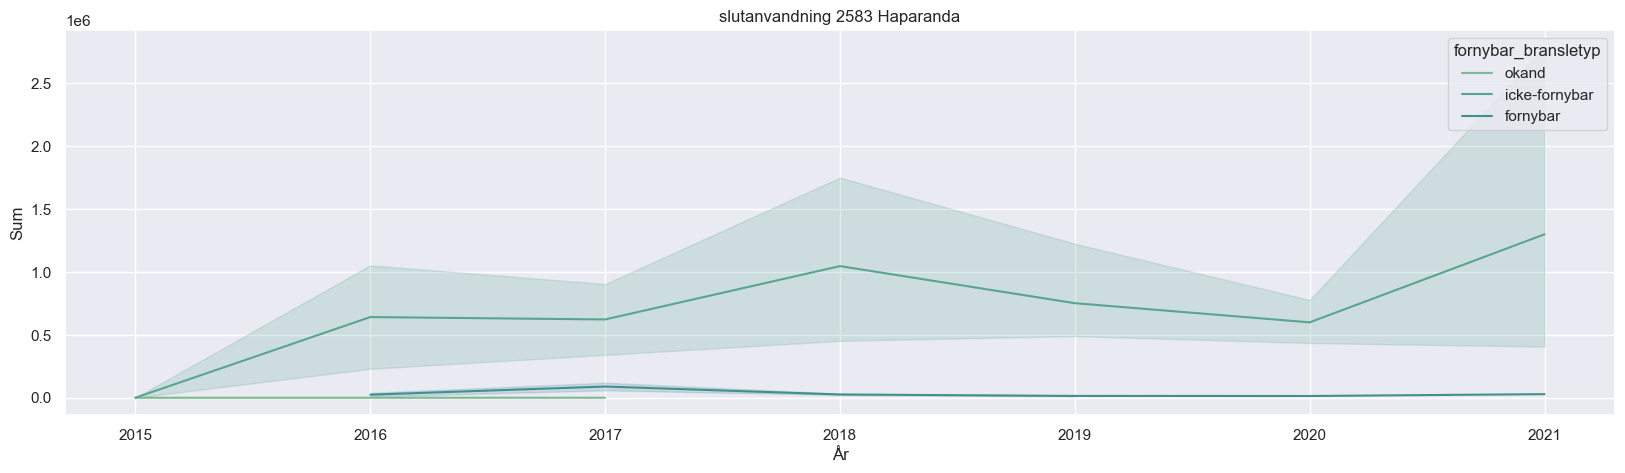

2584 Kiruna


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


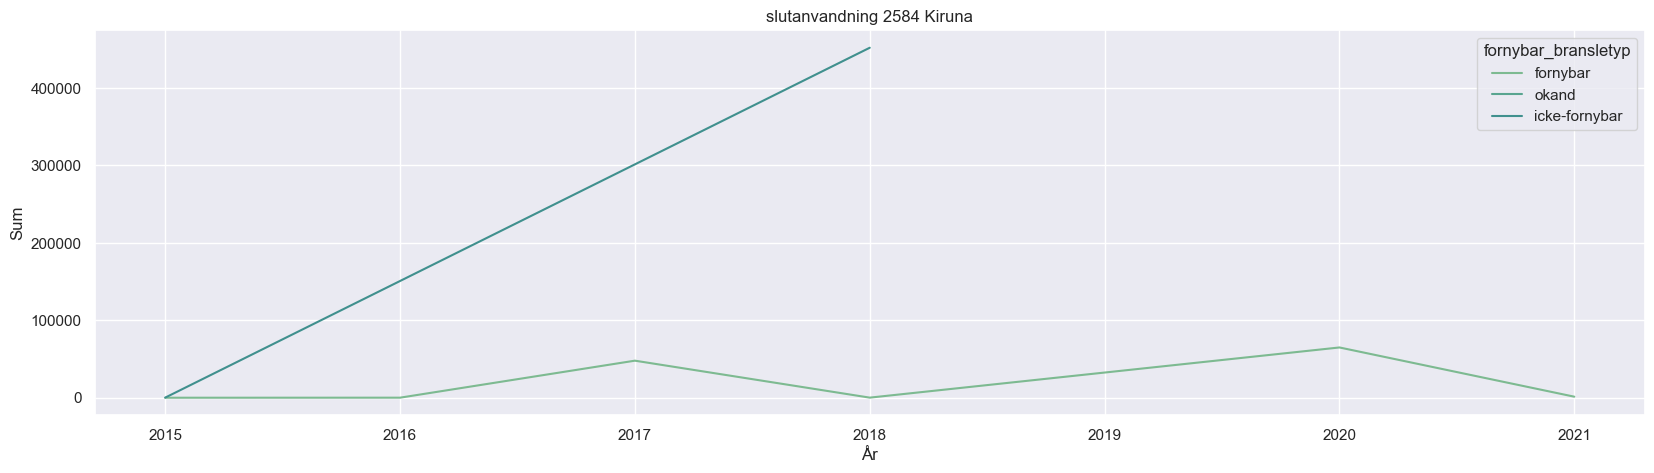

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


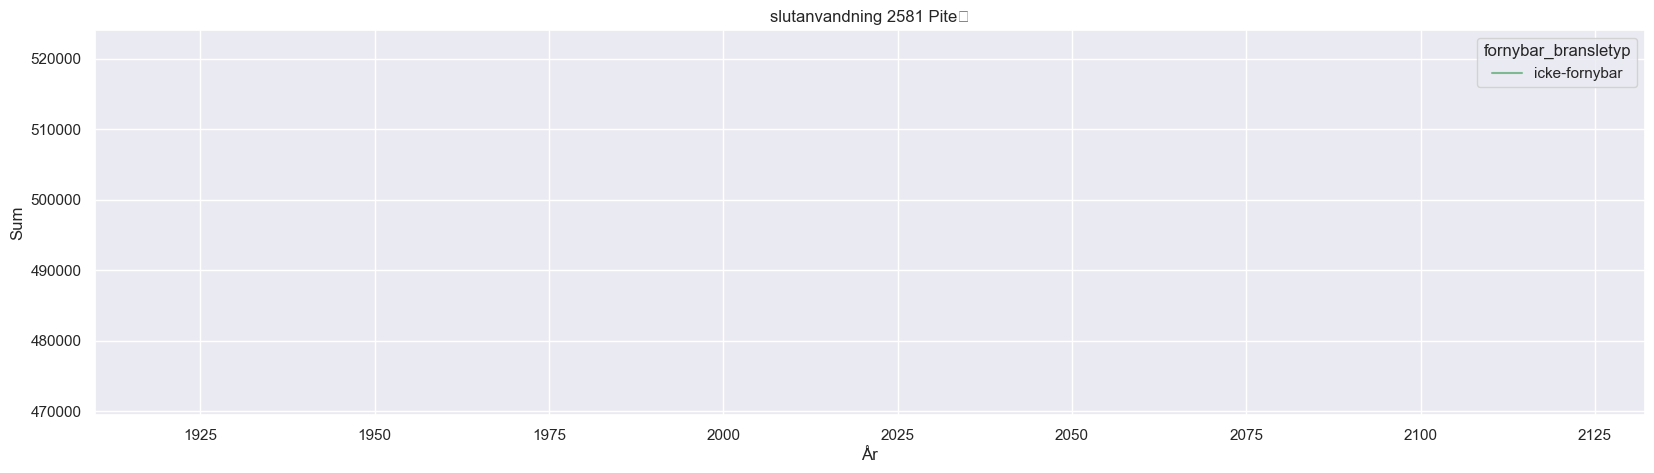

2582 Boden


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3980526332.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


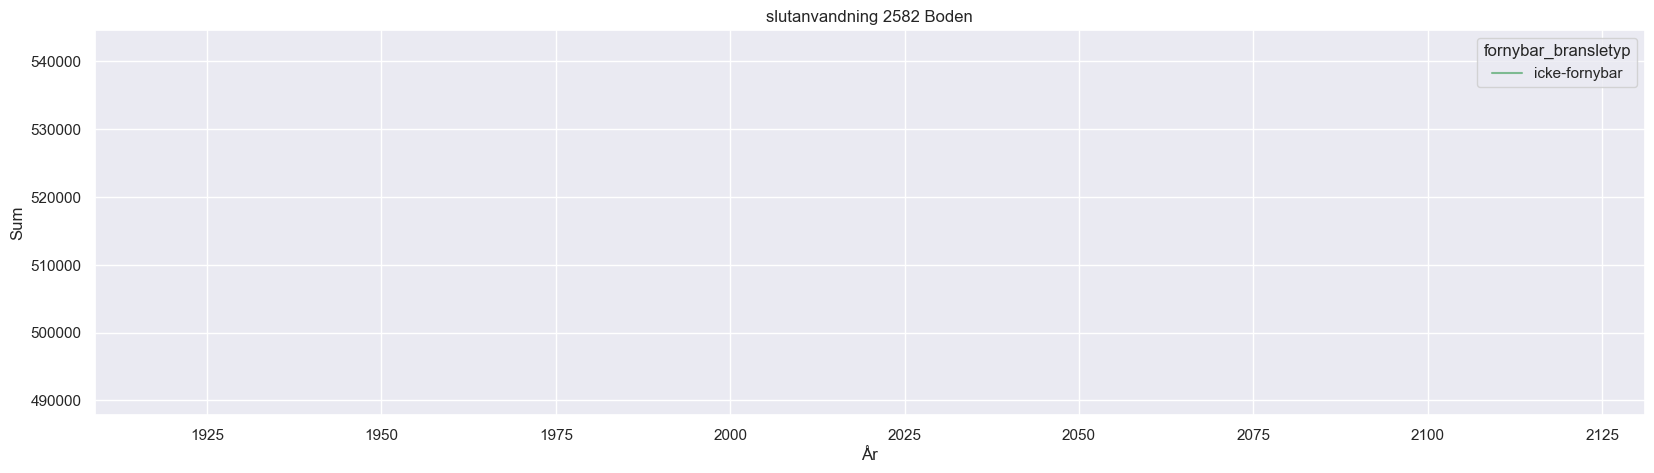

In [225]:
# slutanvandning



slutanvandning_grouped = slutanvandning.groupby(['region', 'ar', 'fornybar_bransletyp', 'forbrukarkategori'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

slutanvandning_grouped



slutanvandning_grouped.region.tail(50).drop_duplicates(
    keep='first').reset_index(drop=True)

# '2560 �lvsbyn', '2580 Lule�', '2581 Pite�', '2582 Boden', '2583 Haparanda', '2584 Kiruna'


slutanvandning_grouped = slutanvandning_grouped[slutanvandning_grouped.region.isin([
    '2560 �lvsbyn', '2580 Lule�', '2581 Pite�', '2582 Boden', '2583 Haparanda', '2584 Kiruna'])].reset_index(drop=True)


# slutanvandning_grouped


for region in slutanvandning_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                    #    style=slutanvandning_grouped.forbrukarkategori
                       )
    fig.set_title('slutanvandning ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### branslefarbrukning

In [235]:
# branslefarbrukning

branslefarbrukning = branslefarbrukning.replace('..', 0)

branslefarbrukning.branslefarbrukning = branslefarbrukning.branslefarbrukning.astype(float)


branslefarbrukning_grouped = branslefarbrukning.groupby(['ar', 'fornybar_bransletyp', 'produktionsslag'], as_index=False
                                                ).agg(
                                                Mean=('branslefarbrukning', np.mean),
                                                Sum=('branslefarbrukning', np.sum),
                                                Avg=('branslefarbrukning', np.average),
                                                Count=('branslefarbrukning', 'count'),
                                                Max=('branslefarbrukning', np.max),
                                                Min=('branslefarbrukning', np.min)
).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# branslefarbrukning_grouped



branslefarbrukning_grouped.produktionsslag.tail(200).drop_duplicates(
    keep='first').reset_index(drop=True)

# 'summa', 'kraftv�rme-v�rmeverk, enbart v�rmeproduktion', 'frist�ende v�rmeverk', 'kraftv�rme-v�rmeverk, kraftv�rmedrift'


branslefarbrukning_grouped = branslefarbrukning_grouped[branslefarbrukning_grouped.produktionsslag.isin([
    'summa', 'kraftv�rme-v�rmeverk, enbart v�rmeproduktion', 'frist�ende v�rmeverk', 'kraftv�rme-v�rmeverk, kraftv�rmedrift'])].reset_index(drop=True)


branslefarbrukning_grouped



for produktionsslag in branslefarbrukning_grouped.produktionsslag.drop_duplicates(keep='first').reset_index(drop=True):

    print(produktionsslag)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = branslefarbrukning_grouped[branslefarbrukning_grouped.produktionsslag == produktionsslag].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp'
                       )
    fig.set_title('slutanvandning ' + produktionsslag)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


,ar,fornybar_bransletyp,produktionsslag,Mean,Sum,Avg,Count,Max,Min
292,2014,icke-fornybar,frist�ende v�rmeverk,397.857143,5570.0,397.857143,14,3399.0,0.0
209,2007,icke-fornybar,"kraftv�rme-v�rmeverk, enbart v�rmeproduktion",467.571429,6546.0,467.571429,14,4822.0,0.0
304,2015,icke-fornybar,frist�ende v�rmeverk,477.642857,6687.0,477.642857,14,4500.0,0.0
340,2018,icke-fornybar,frist�ende v�rmeverk,500.357143,7005.0,500.357143,14,4946.0,0.0
280,2013,icke-fornybar,frist�ende v�rmeverk,506.428571,7090.0,506.428571,14,3739.0,0.0
...,...,...,...,...,...,...,...,...,...
347,2018,okand,summa,51691.750000,206767.0,51691.750000,4,182696.0,2688.0
275,2012,okand,summa,51853.750000,207415.0,51853.750000,4,183162.0,2848.0
239,2009,okand,summa,52022.500000,208090.0,52022.500000,4,181403.0,3308.0
383,2021,okand,summa,54609.750000,218439.0,54609.750000,4,191188.0,1085.0


### energidata

In [250]:
energidata = energidata.replace('..', 0)

energidata.MWh = energidata.MWh.astype(float)


energidata_grouped = energidata.groupby(['region', 'ar', 'fornybar_energityp', 'fornybar_kategori'], as_index=False
                                                ).agg(
                                                Mean=('MWh', np.mean),
                                                Sum=('MWh', np.sum),
                                                Avg=('MWh', np.average),
                                                Count=('MWh', 'count'),
                                                Max=('MWh', np.max),
                                                Min=('MWh', np.min)
).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# energidata_grouped



energidata_grouped.region.tail(50).drop_duplicates(
    keep='first').reset_index(drop=True)

# '03 Uppsala l�n', '0382 �sthammar', '13 Hallands l�n', '1383 Varberg', '08 Kalmar l�n', '0882 Oskarshamn', '00 Riket'


energidata_grouped = energidata_grouped[energidata_grouped.region.isin([
    '03 Uppsala l�n', '0382 �sthammar', '13 Hallands l�n', '1383 Varberg', '08 Kalmar l�n', '0882 Oskarshamn', '00 Riket'])].reset_index(drop=True)


# energidata_grouped


,region,ar,fornybar_energityp,fornybar_kategori,Mean,Sum,Avg,Count,Max,Min
1124,0126 Huddinge,2003,okand,fornybar,-1.813353e+03,-2.157890e+05,-1.813353e+03,119,152046.0,-930264.0
11879,0861 M�nster�s,2008,okand,okand,-9.560902e+02,-1.271600e+05,-9.560902e+02,133,82044.0,-682067.0
14,00 Riket,1995,fornybar,karnkraft,0.000000e+00,0.000000e+00,0.000000e+00,66,0.0,0.0
17,00 Riket,1995,icke-fornybar,icke-fornybar,0.000000e+00,0.000000e+00,0.000000e+00,14,0.0,0.0
18,00 Riket,1995,icke-fornybar,karnkraft,0.000000e+00,0.000000e+00,0.000000e+00,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
46,00 Riket,2001,okand,karnkraft,1.377550e+07,2.892854e+08,1.377550e+07,21,214078330.0,0.0
94,00 Riket,2005,okand,karnkraft,1.385855e+07,2.910295e+08,1.385855e+07,21,215370469.0,0.0
82,00 Riket,2004,okand,karnkraft,1.463316e+07,3.072964e+08,1.463316e+07,21,227063038.0,0.0
11,00 Riket,1990,okand,okand,2.106795e+07,2.802037e+09,2.106795e+07,133,511212104.0,0.0


00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(


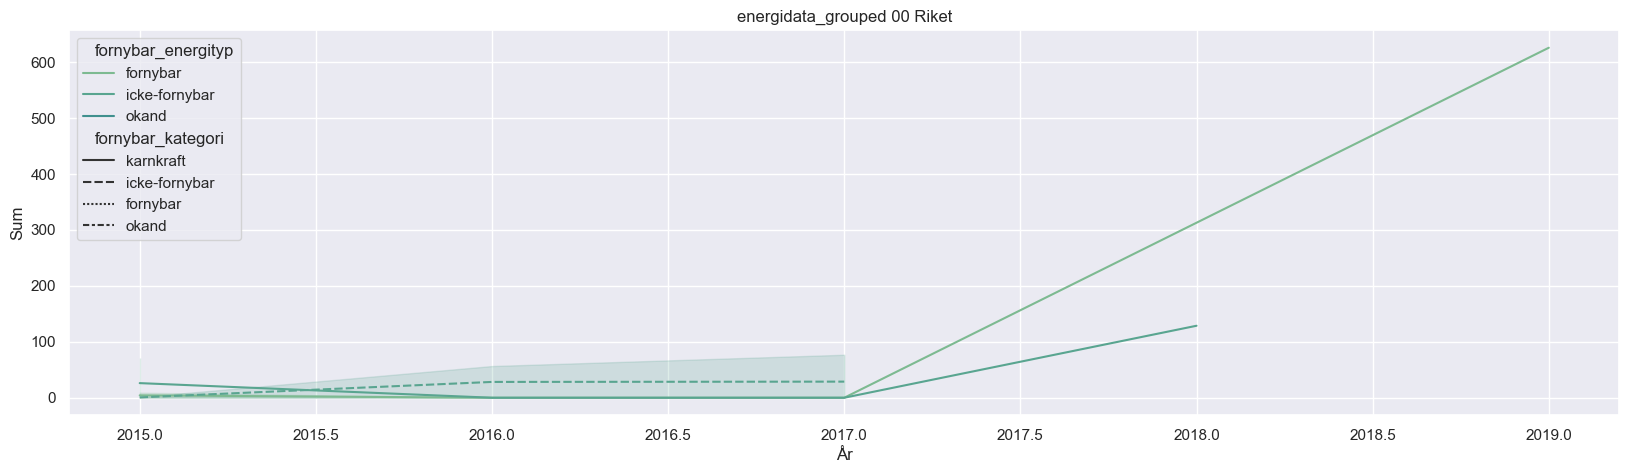

03 Uppsala l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


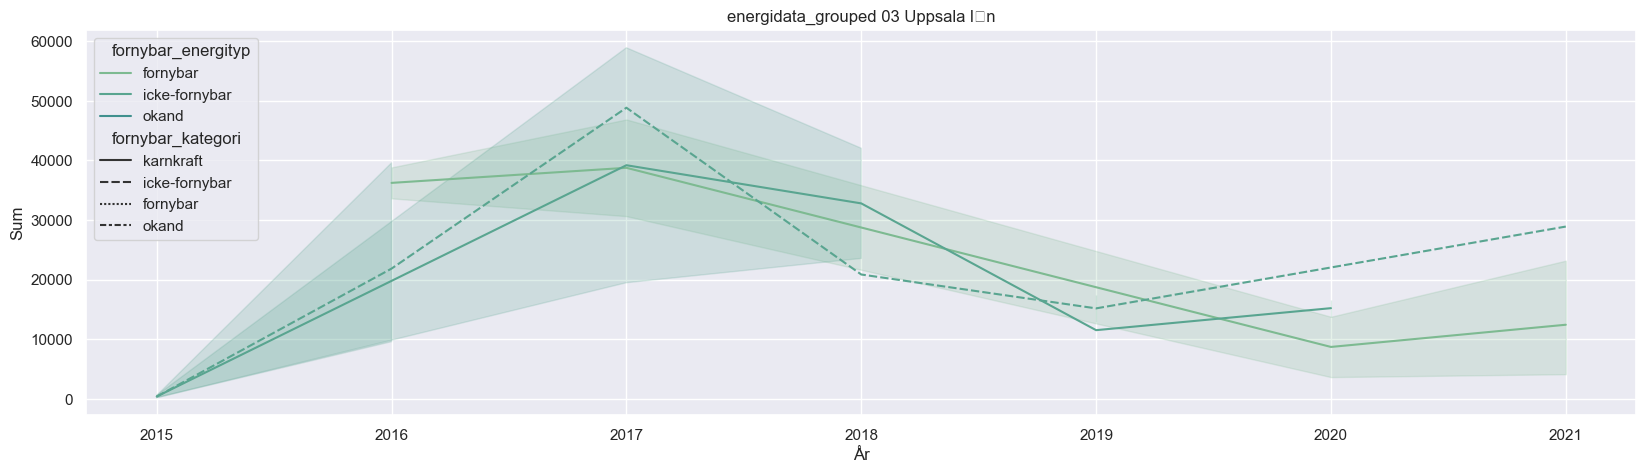

0382 �sthammar


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


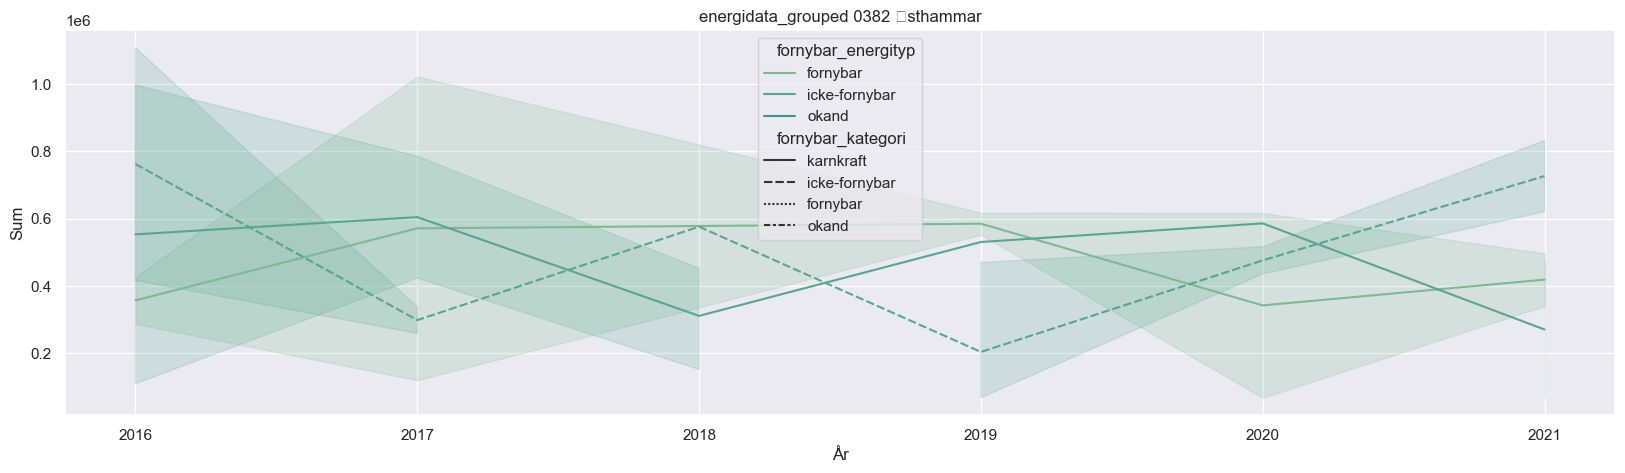

08 Kalmar l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


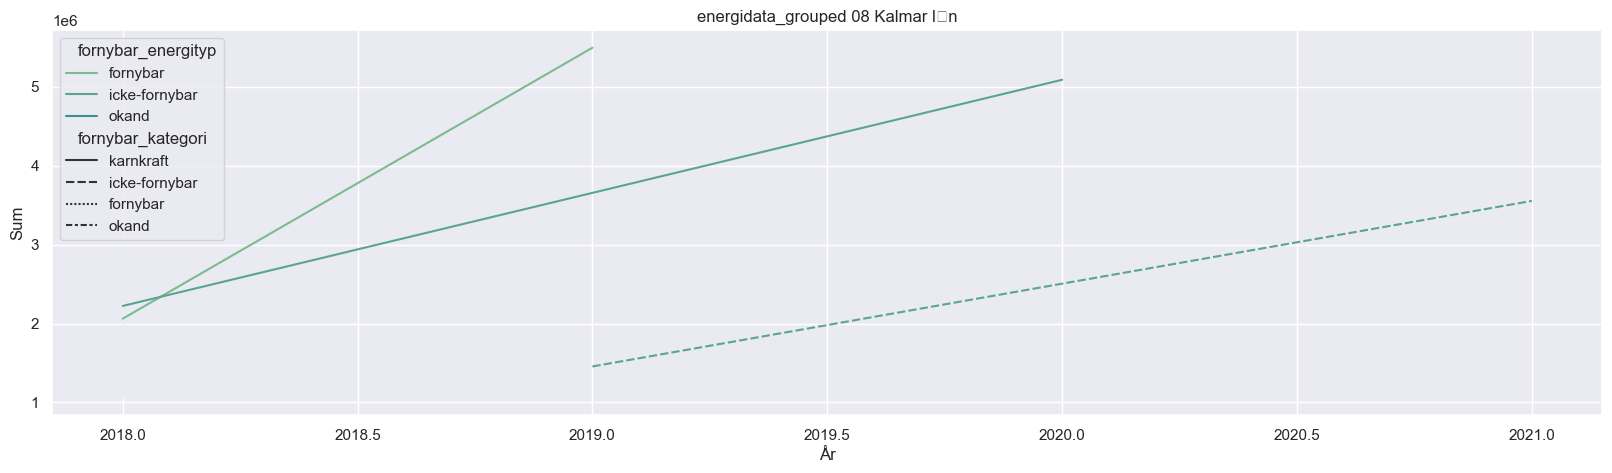

0882 Oskarshamn


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(


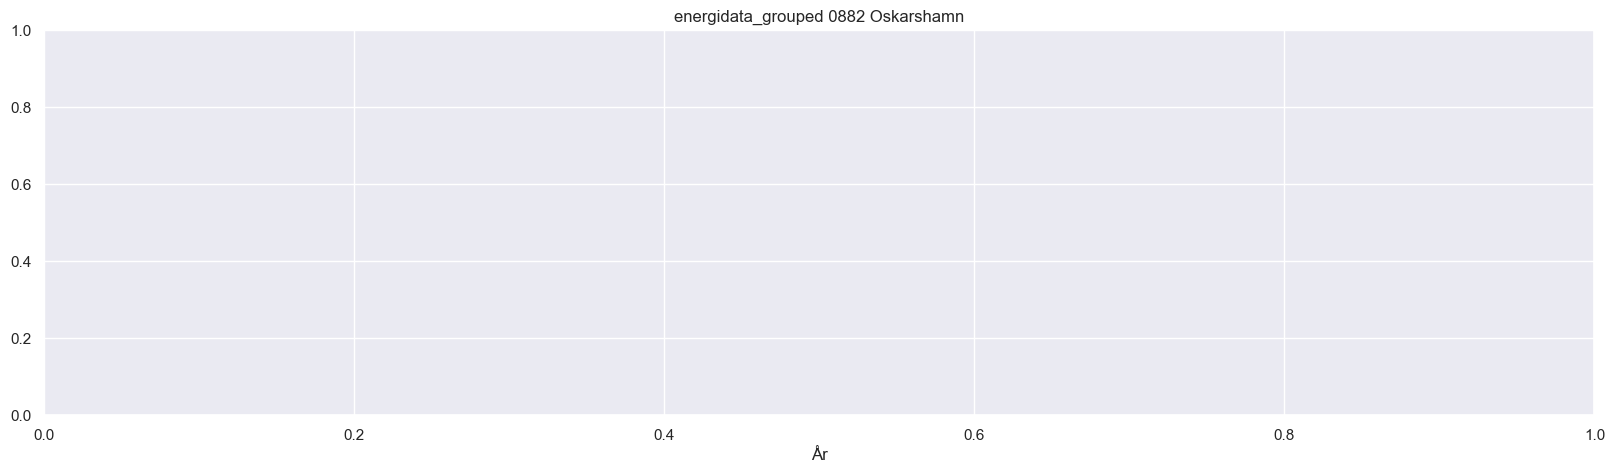

13 Hallands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


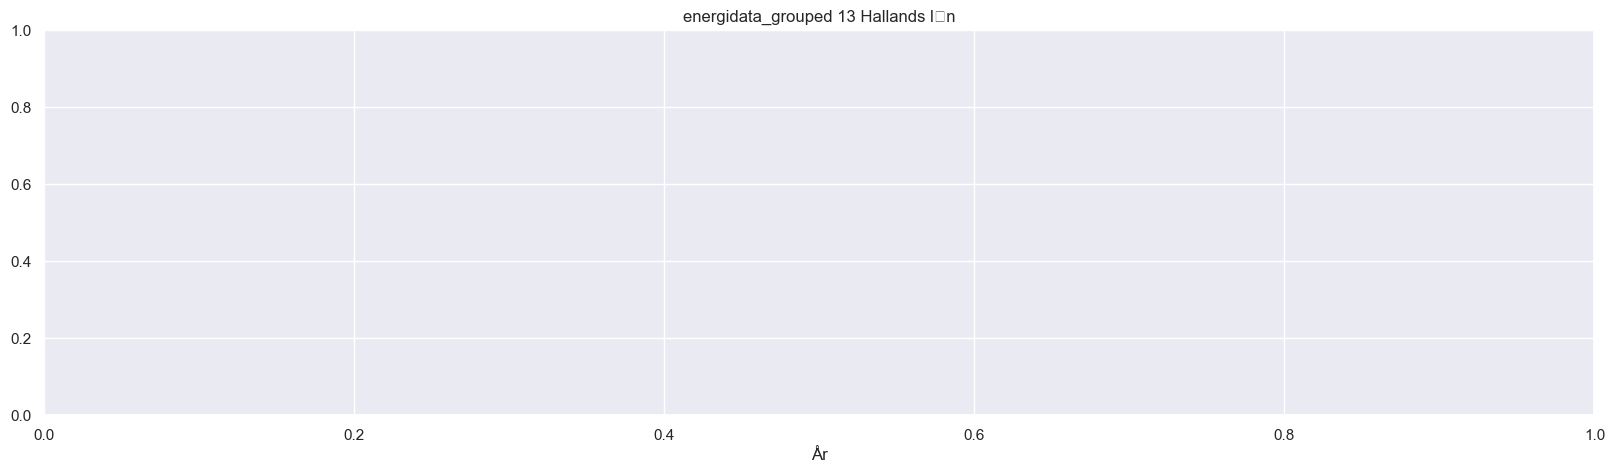

1383 Varberg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3181799367.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(


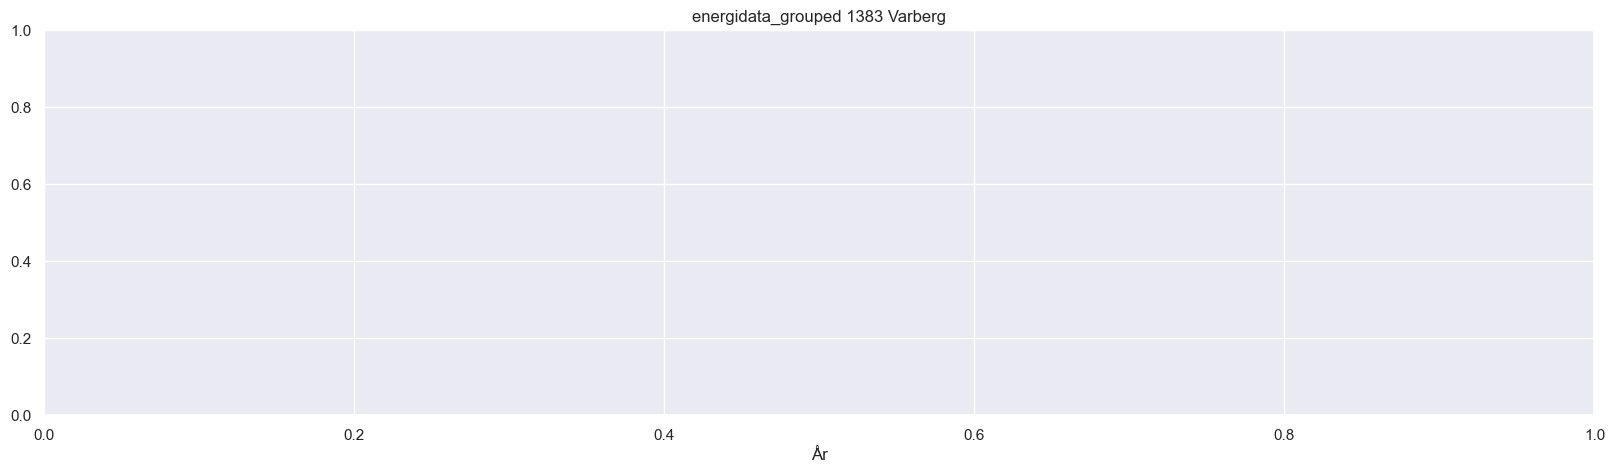

In [255]:


for region in energidata_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue=energidata_grouped.fornybar_energityp,
                       style=energidata_grouped.fornybar_kategori)
    fig.set_title('energidata_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)
